<a href="https://colab.research.google.com/github/MargoNupreichik/DS_jobs_salaries_analysis/blob/main/ds_job_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"margaritanupreichik","key":"fe28d66f39a29c61d5111c1462303f3f"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!cat ~/.kaggle/kaggle.json

{"username":"margaritanupreichik","key":"fe28d66f39a29c61d5111c1462303f3f"}

In [5]:
%cd /content/data

/content/data


In [7]:
! kaggle datasets download -d abhinavshaw09/data-science-job-salaries-2024

data-science-job-salaries-2024.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
path = '/content/data/'
import zipfile
with zipfile.ZipFile(path+'data-science-job-salaries-2024.zip', 'r') as zip_ref:
    zip_ref.extractall(path)

In [9]:
import pandas as pd
df = pd.read_csv(path+'salaries.csv')

In [10]:
df.head(n=10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M
5,2024,MI,FT,Business Intelligence Developer,95413,USD,95413,US,100,US,M
6,2024,MI,FT,Business Intelligence Developer,70692,USD,70692,US,100,US,M
7,2024,SE,FT,Data Engineer,110000,USD,110000,UA,0,UA,M
8,2024,SE,FT,Data Engineer,48000,USD,48000,UA,0,UA,M
9,2024,SE,FT,Data Scientist,222300,USD,222300,US,0,US,M


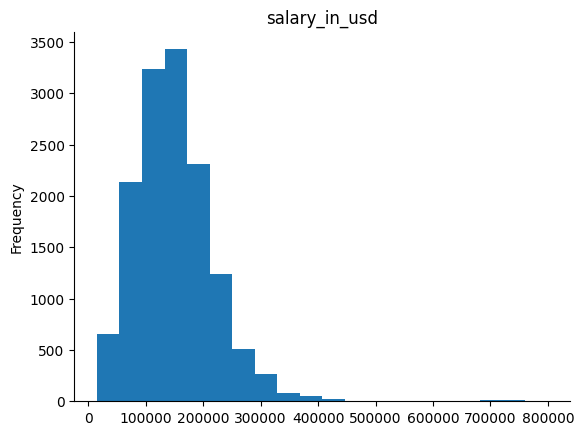

In [16]:
# @title salary_in_usd

from matplotlib import pyplot as plt
df['salary_in_usd'].plot(kind='hist', bins=20, title='salary_in_usd')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-15-40d0d0d45285>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='salary', y='experience_level', inner='box', palette='Dark2')


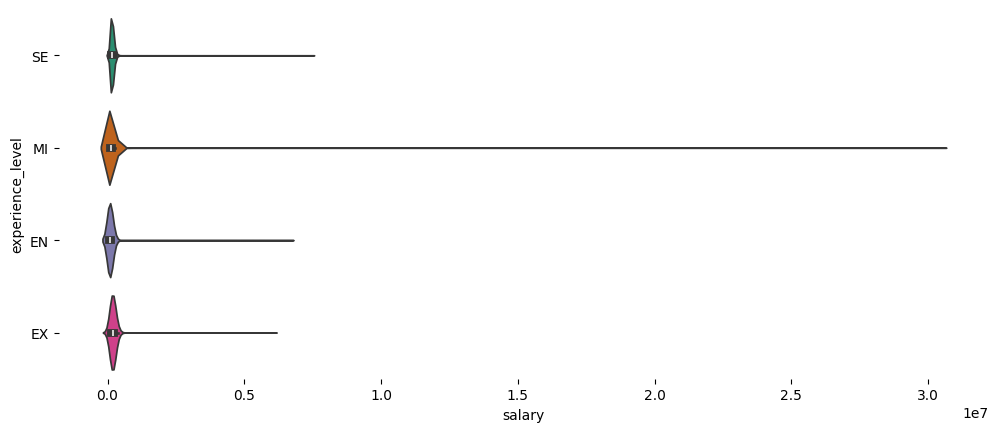

In [15]:
# @title experience_level vs salary

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['experience_level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='salary', y='experience_level', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)